In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [5]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isna().sum(axis = 0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
# Eliminiamos cabina por tener un nivel de  completitud muy bajo
df = df.drop(['Cabin'], axis = 1)

In [9]:
# los modelos no nos permiten entrenar con bases con datos perdidos
df = df[df.Age.notna()]

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
vars_disc = ['Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked']

for i in vars_disc:
    df[i].value_counts()

0    424
1    290
Name: Survived, dtype: int64
3    355
1    186
2    173
Name: Pclass, dtype: int64
male      453
female    261
Name: Sex, dtype: int64
0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64
0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    554
C    130
Q     28
Name: Embarked, dtype: int64


In [17]:
#variables categoricas
vars_cat = ['Pclass', 'Sex', 'Embarked']
            
# hacemos un one hot encoding: proceso en que la variable 
# categorica se expresacomo 1 o 0
def one_hot():
    for i in vars_cat:
        categorias = df[i].value_counts().index   
        print(categorias)

        for k in categorias:
            name = 'is-' + str(i) + '-' + str(k)
            print(name)
            df[name] = np.where(df[i] ==k, 1, 0)

        df = df.drop([i], axis = 1)

In [23]:
# Identificacion de outliers 

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'is-Pclass-3', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Sex-female', 'is-Embarked-S', 'is-Embarked-C', 'is-Embarked-Q'],
      dtype='object')

In [21]:
df['family_size'] = df['SibSp'] + df['Parch']

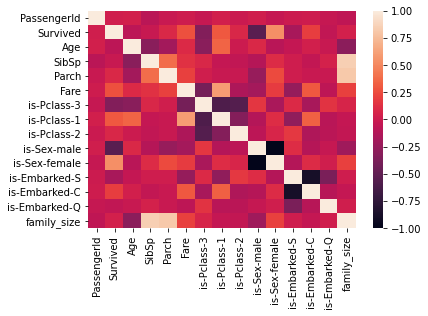

In [24]:
corr = df.corr()
sns.heatmap(corr, yticklabels=corr.columns, xticklabels=corr.columns)

In [25]:
#hint titanic-master-table.csv sera la bd con el train limpio